In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

##### El sector de Marketing requiere de un análisis exhaustivo sobre sus campañas lanzadas, cuentan con un dato que denominan “conversión” y tiene que ver con que si un cliente, hizo un consumo, en base a la campaña que se le hizo llegar. Ese dato nos dice el grado de efectividad de las campañas. El requisito es la creación de un modelo predictivo que logre predecir la efectividad de una campaña en base a sus características.
- Costo1 y Costo2: son índices de costo de puesta en marcha
de la campaña.
- Tópico: Tiene que ver con la temática en la que está basada
la campaña.
- Quincena: Es la quincena en el año, se toman 2 por mes.
- TipoProducto: Son las categorías de los productos.
- Conversión: Si el cliente compró o no el producto.

In [2]:
data = pd.read_csv('Datasets/conversiones.csv')

In [3]:
data.head()

,Costo1,Costo2,Topico,Quincena,TipoProducto,Conversion
0,0.341,0.299,2,7,1,Si
1,0.151,0.079,2,8,1,Si
2,0.384,0.324,4,9,1,Si
3,0.200,0.192,4,9,1,Si
4,0.415,0.020,2,8,1,Si


In [4]:
data.isna().sum()

Costo1          0
Costo2          0
Topico          0
Quincena        0
TipoProducto    0
Conversion      0
dtype: int64

In [5]:
data['Conversion'] = data['Conversion'].map({'Si':1, 'No':0})

In [6]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

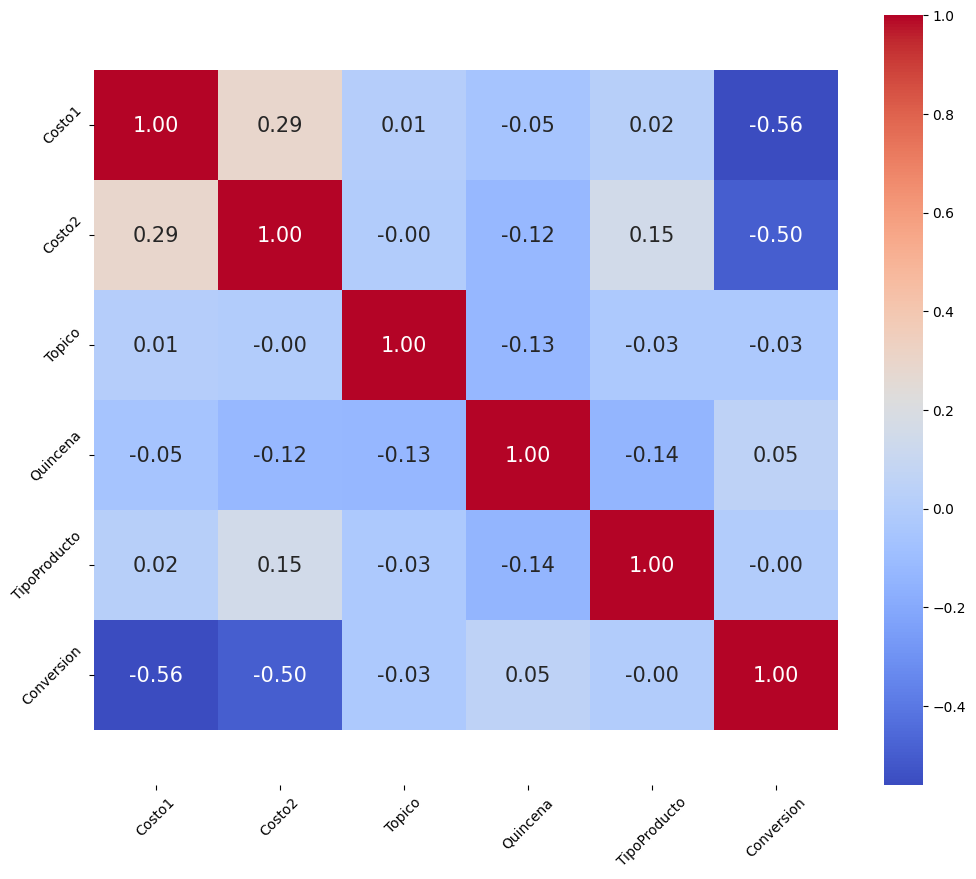

In [7]:
corr = data.corr()
plot_corre_heatmap(corr)

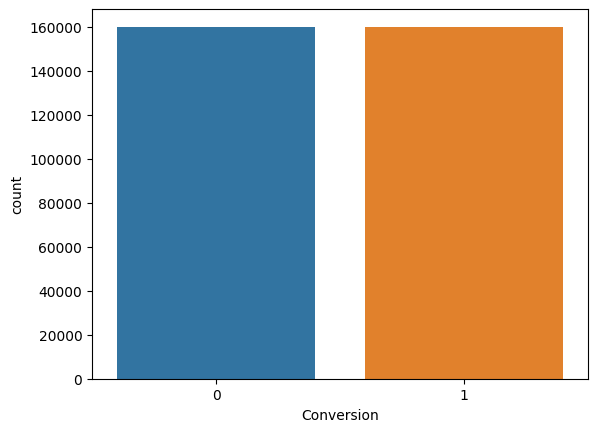

In [8]:
sns.countplot(x= 'Conversion', data=data)
plt.show()

In [9]:
data.columns

Index(['Costo1', 'Costo2', 'Topico', 'Quincena', 'TipoProducto', 'Conversion'], dtype='object')

In [13]:
X = data[['Costo1','Costo2','Topico','Quincena','TipoProducto']]
y = data.Conversion

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [15]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

Completado: 5.26%
Completado: 10.53%
Completado: 15.79%
Completado: 21.05%
Completado: 26.32%
Completado: 31.58%
Completado: 36.84%
Completado: 42.11%
Completado: 47.37%
Completado: 52.63%
Completado: 57.89%
Completado: 63.16%
Completado: 68.42%
Completado: 73.68%
Completado: 78.95%
Completado: 84.21%
Completado: 89.47%
Completado: 94.74%
Completado: 100.0%


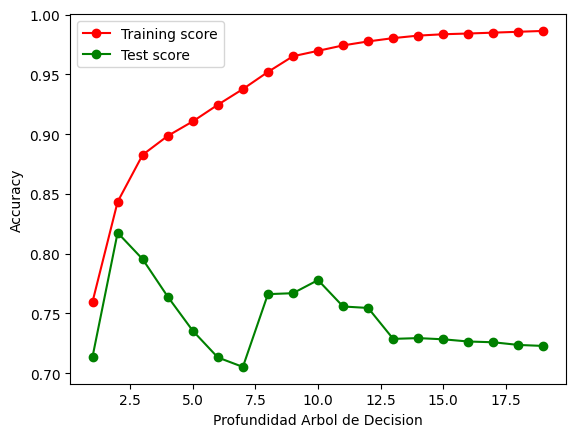

In [25]:
plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

In [17]:
X = data[['Costo1', 'Costo2']]

In [20]:
knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

n_vecinos = np.arange(1,20,1)
i = 0
i_max = len(n_vecinos)
for vecinos in n_vecinos:
    i = i + 1
    clf = KNeighborsClassifier(n_neighbors=vecinos)
    knn_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    knn_train_scores_mean.append(knn_scores['train_score'].mean())
    knn_train_scores_std.append(knn_scores['train_score'].std())
    
    knn_test_scores_mean.append(knn_scores['test_score'].mean())
    knn_test_scores_std.append(knn_scores['test_score'].std())
    
    #clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)

Completado: 5.26%
Completado: 10.53%
Completado: 15.79%
Completado: 21.05%
Completado: 26.32%
Completado: 31.58%
Completado: 36.84%
Completado: 42.11%
Completado: 47.37%
Completado: 52.63%
Completado: 57.89%
Completado: 63.16%
Completado: 68.42%
Completado: 73.68%
Completado: 78.95%
Completado: 84.21%
Completado: 89.47%
Completado: 94.74%
Completado: 100.0%


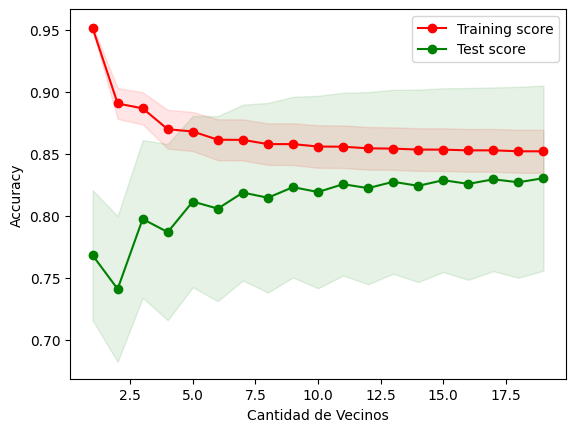

In [21]:
plt.fill_between(n_vecinos, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(n_vecinos, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(n_vecinos, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(n_vecinos, knn_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()

In [22]:
X = data[['Costo1','Costo2','Topico','Quincena','TipoProducto']]

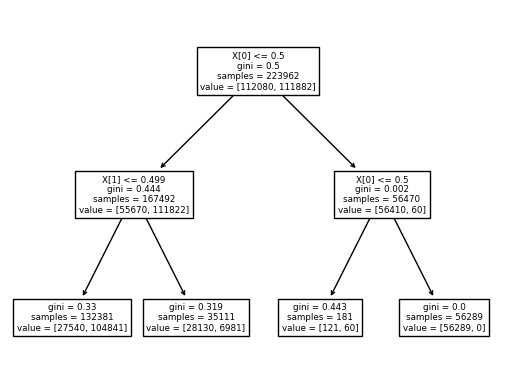

In [23]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth = 2)

tree.plot_tree(clf.fit(X_train,y_train))
plt.show()